In [7]:
! pip install -q easyocr

In [8]:
import cv2
import numpy as np
import pandas as pd
import easyocr
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from glob import glob
from random import sample
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

from pathlib import Path

In [10]:
reader = easyocr.Reader(['en'], gpu=False)

Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[]


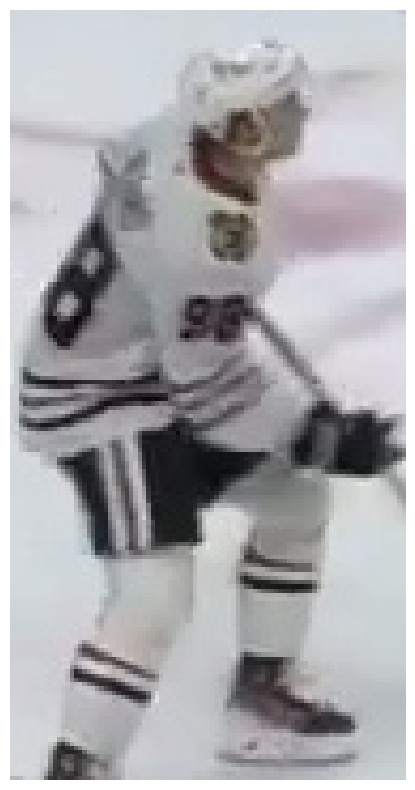

In [17]:
file = '../output_videos/player_1_cropped.jpg'
# Read the image
img = cv2.imread(file)
# Convert BGR to RGB (OpenCV uses BGR by default)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Get the detection results
results = reader.readtext(file, allowlist='0123456789')

# Draw bounding box and text
for (bbox, text, prob) in results:
    # Get coordinates
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))
    
    # Draw rectangle
    img = cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)
    
    # Add text
    img = cv2.putText(img, text, (top_left[0], top_left[1] - 10),
                      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()